In [5]:
student_table = {
    '1':12.706,
    '2':4.3027,
    '3':3.1825,
    '4':2.7764,
    '5':2.5706,
    '6':2.4469,
    '7':2.3646,
    '8':2.3060,
    '9':2.2622,
    '10':2.2281,
    '11':2.2010,
    '12':2.1788,
    '13':2.1604,
    '14':2.1448,
    '15':2.1315
}

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.array([78, 80, 87, 79, 106])
y = np.array([113,148, 135, 154, 157])
y_avg = np.average(y)
x_avg = np.average(x)
z = 1/x
z_avg = np.average(z)
b = np.cov(z,y)[0, 1]/np.cov(z,z)[0, 1]
a = y_avg - b*z_avg
reg = a + b/x
A = np.abs((y-reg)/y) * 100

data = {
    'x':x,
    'y':y,
    'z': z,
    'xy':x*y,
    'x^2':x**2,
    '(x-x_avg)^2': (x-x_avg)**2,
    '(y-y_avg)^2':  (y-y_avg)**2,
    '(z-z_avg)^2': (z-z_avg)**2,
    'regression' : reg,
    'y-reg': y - reg,
    '(y-reg)^2': (y - reg) ** 2,
    'appr': A    
}
df = pd.DataFrame(data)
sum_row = df.sum()
mean_row = df.mean()

# Создаем DataFrame из новых строк
sum_df = pd.DataFrame(sum_row).T
mean_df = pd.DataFrame(mean_row).T

# Устанавливаем индексы для строк с суммой и средним
sum_df.index = ['Sum']
mean_df.index = ['Mean']

# Присоединяем строки к исходному DataFrame
df = pd.concat([df, sum_df, mean_df])

# Индекс корреляции (ро xy)
corr_ind = np.sqrt(1 - (df.loc['Sum', '(y-reg)^2']/ 
                                  df.loc['Sum', '(y-y_avg)^2']))

# Коэфициент эластичности
elast = -b/(a*x_avg  + b)

# beta-коэфициент
# beta = b * (sigma_z / sigma_y)
n = len(x)
sigma_x = np.sqrt(df.loc['Sum', '(x-x_avg)^2'] / n)
sigma_y = np.sqrt(df.loc['Sum', '(y-y_avg)^2'] / n)
sigma_z = np.sqrt(df.loc['Sum', '(z-z_avg)^2'] / n)
beta = b * (sigma_x/sigma_y)

# Детерминация 
R = np.round(corr_ind**2, 4)

# F-критерий Фишера
m = 1 # число степеней свободы
F = np.round((R / (1-R)) * ((n- m - 1) / m), 2)

# Остаточная диспресия
S_rem = df.loc['Sum', '(y-reg)^2'] / (n - 2)

# Стандартные ошибки
ma = np.sqrt(S_rem) * (np.sqrt(df.loc['Sum', 'x^2']) / (sigma_x * n))
ta = a / ma

mb = np.sqrt(S_rem) / (sigma_z * np.sqrt(n))
tb = b / mb

mrxy = np.sqrt((1 - R) / (n - 2))
trxy = corr_ind / mrxy

# Доверительный интервал по a и b
# число степеней свободы = n - (кол-во x) - 1 
t_tab = student_table[str(n-1-1)]
da = ma * t_tab
db = mb * t_tab
trust_int_a = (a - da, a + da)
trust_int_b = (b - db, b + db)

# Прогноз
forecast = 1.2
x_forecast = x_avg * forecast
reg_forecast = a + b / x_forecast
mreg_forecast = np.sqrt(S_rem * (1 + (1/n) + (((x_forecast - x_avg)**2)/df.loc['Sum', '(x-x_avg)^2'])))
dreg_forecast = mreg_forecast * t_tab
trust_int_reg_forecast = (reg_forecast - dreg_forecast, reg_forecast + dreg_forecast)


In [8]:
df

,x,y,z,xy,x^2,(x-x_avg)^2,(y-y_avg)^2,(z-z_avg)^2,regression,y-reg,(y-reg)^2,appr
0,78.0,113.0,0.012821,8814.0,6084.0,64.0,806.56,1.079774e-06,135.066686,-2.206669e+01,486.938627,19.528041
1,80.0,148.0,0.012500,11840.0,6400.0,36.0,43.56,5.163987e-07,137.020171,1.097983e+01,120.556651,7.418804
2,87.0,135.0,0.011494,11745.0,7569.0,1.0,40.96,8.244840e-08,143.150071,-8.150071e+00,66.423662,6.037090
3,79.0,154.0,0.012658,12166.0,6241.0,49.0,158.76,7.688426e-07,136.055792,1.794421e+01,321.994596,11.652083
4,106.0,157.0,0.009434,16642.0,11236.0,400.0,243.36,5.510422e-06,155.707280,1.292720e+00,1.671125,0.823389
Sum,430.0,707.0,0.058907,61207.0,37530.0,550.0,1293.20,7.957886e-06,707.000000,-2.842171e-14,997.584661,45.459406
Mean,86.0,141.4,0.011781,12241.4,7506.0,110.0,258.64,1.591577e-06,141.400000,-5.684342e-15,199.516932,9.091881


In [9]:
# 1-я группа 
print(corr_ind)
print(R)
print(elast)
print(beta)

0.4781130904340956
0.2286
0.4979125220506654
-3974.7802732815917


In [10]:
# 2-я группа
print(F)
print(S_rem)

0.89
332.5282203491627


In [11]:
# 3-я группа (стандартные ошибки)
print(ma)
print(ta)

print(mb)
print(tb)

print(mrxy)
print(trxy)

67.3654459839736
3.1649174818658614
6464.209162616844
-0.9428643788218022
0.507083162147328
0.9428691901530436


In [12]:
# 4-я группа (доверительные интервалы)
print(trust_int_a)
print(trust_int_b)

(-1.1844541756275646, 427.59660951236447)
(-26667.218216713038, 14477.473103343174)


In [13]:
# 5-я группа (прогноз)
print(x_forecast)
print(reg_forecast)
print(mreg_forecast)
print(dreg_forecast)
print(trust_int_reg_forecast)

103.2
154.14723506483227
24.039504386758654
76.50572271085942
(77.64151235397286, 230.65295777569168)


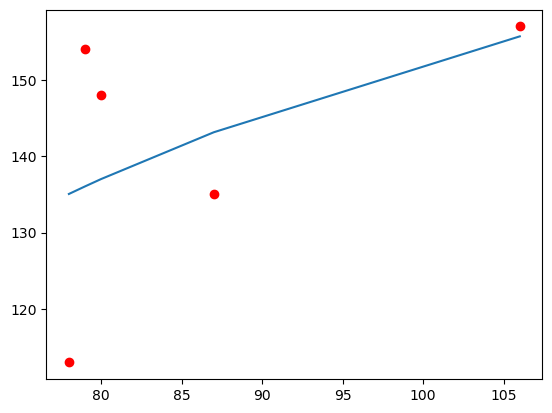

In [14]:
sorted_indexes = np.argsort(x)
x_sorted = x[sorted_indexes]
reg_sorted = reg[sorted_indexes]
plt.plot(x_sorted, reg_sorted)
plt.scatter(x,y, color='red')
plt.show()